# 1. Setup and Get Data

### 1.1 Install Dependencies and Setup

In [110]:
!pip install labelme tensorflow tensorflow opencv-python matplotlib albumentations

/bin/bash: warning: setlocale: LC_ALL: cannot change locale (en_US.UTF-8)
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3 -m pip install --upgrade pip


### 1.2 Collect Images Using OpenCV

In [111]:
import os
import time
import uuid
import cv2

In [112]:
IMAGES_PATH = os.path.join('data','images')
number_images = 30

In [113]:
# cap = cv2.VideoCapture(1)
# for imgnum in range(number_images):
#     print('Collecting image {}'.format(imgnum))
#     ret, frame = cap.read()
#     imgname = os.path.join(IMAGES_PATH,f'{str(uuid.uuid1())}.jpg')
#     cv2.imwrite(imgname, frame)
#     cv2.imshow('frame', frame)
#     time.sleep(0.5)
# 
#     if cv2.waitKey(1) & 0xFF == ord('q'):
#         break
# cap.release()
# cv2.destroyAllWindows()

In [114]:
# !sudo apt-get install --reinstall libxcb-xinerama0 -y -qq --no-install-recommends

### 1.3 Annotate Images with LabelMe

In [115]:
# !labelme

# 2. Review Dataset and Build Image Loading Function

### 2.1 Import TF and Deps

In [116]:
import tensorflow as tf
import json
import numpy as np
from matplotlib import pyplot as plt

### 2.2 Limit GPU Memory Growth

In [117]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [118]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

### 2.3 Load Image into TF Data Pipeline

In [119]:
images = tf.data.Dataset.list_files('data/images/*.jpg', shuffle=False)

In [120]:
images.as_numpy_iterator().next()

b'data/images/b72e7eba-dc9e-11ee-9999-38dead267707.jpg'

In [121]:
def load_image(x): 
    byte_img = tf.io.read_file(x)
    img = tf.io.decode_jpeg(byte_img)
    return img

In [122]:
images = images.map(load_image)

In [123]:
images.as_numpy_iterator().next()

array([[[33, 33, 23],
        [35, 35, 25],
        [35, 35, 25],
        ...,
        [30, 23,  7],
        [30, 21,  6],
        [28, 19,  4]],

       [[35, 35, 25],
        [35, 35, 25],
        [35, 35, 25],
        ...,
        [29, 22,  6],
        [30, 21,  6],
        [29, 20,  5]],

       [[34, 36, 25],
        [33, 35, 24],
        [32, 34, 23],
        ...,
        [28, 21,  5],
        [30, 21,  6],
        [30, 21,  6]],

       ...,

       [[15, 16,  2],
        [16, 17,  3],
        [17, 18,  4],
        ...,
        [15, 13,  0],
        [16, 14,  1],
        [16, 14,  1]],

       [[15, 17,  3],
        [16, 18,  4],
        [18, 19,  5],
        ...,
        [16, 14,  1],
        [16, 14,  1],
        [16, 14,  1]],

       [[15, 17,  3],
        [16, 18,  4],
        [18, 19,  5],
        ...,
        [16, 14,  1],
        [16, 14,  1],
        [17, 15,  2]]], dtype=uint8)

In [124]:
type(images)

tensorflow.python.data.ops.map_op._MapDataset

### 2.4 View Raw Images with Matplotlib

In [125]:
image_generator = images.batch(4).as_numpy_iterator()

In [126]:
plot_images = image_generator.next()

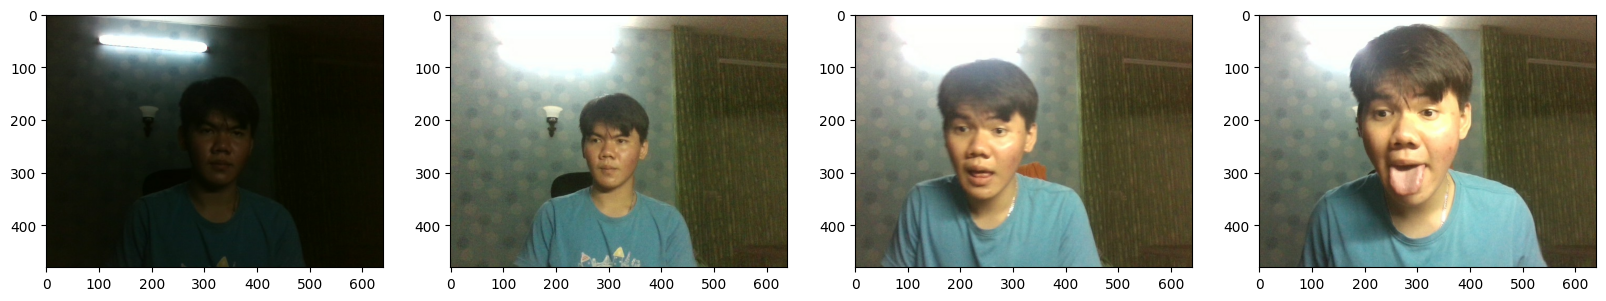

In [127]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, image in enumerate(plot_images):
    ax[idx].imshow(image) 
plt.show()

# 3. Partition Unaugmented Data

### 3.1 MANUALLY SPLT DATA INTO TRAIN TEST AND VAL

### 3.2 Move the Matching Labels

In [128]:
for folder in ['val']:
    os.makedirs(os.path.join('data', folder, 'images'), exist_ok=True)
    os.makedirs(os.path.join('data', folder, 'labels'), exist_ok=True)
    for file in os.listdir(os.path.join('data', folder, 'images')):
        filename = file.split('.')[0]+'.json'
        existing_filepath = os.path.join('data','labels', filename)
        print(existing_filepath)
        if not os.path.exists(existing_filepath): 
            print(f'Could not find {filename}')
        if os.path.exists(existing_filepath): 
            print(f'Found {filename}')
            new_filepath = os.path.join('data',folder,'labels',filename)
            # copy the file from the existing path to the new path
            os.rename(existing_filepath, new_filepath)
            print(f'Moved {filename} to {new_filepath}')

data/labels/e046a79d-dc88-11ee-9a86-38dead267707.json
Could not find e046a79d-dc88-11ee-9a86-38dead267707.json
data/labels/e185dbae-dc88-11ee-a1ed-38dead267707.json
Could not find e185dbae-dc88-11ee-a1ed-38dead267707.json
data/labels/e2baa2e9-dc88-11ee-8176-38dead267707.json
Could not find e2baa2e9-dc88-11ee-8176-38dead267707.json
data/labels/e3ee656f-dc88-11ee-b64b-38dead267707.json
Could not find e3ee656f-dc88-11ee-b64b-38dead267707.json
data/labels/e526444e-dc88-11ee-bb61-38dead267707.json
Could not find e526444e-dc88-11ee-bb61-38dead267707.json
data/labels/e65de334-dc88-11ee-bc36-38dead267707.json
Could not find e65de334-dc88-11ee-bc36-38dead267707.json
data/labels/e792e0c8-dc88-11ee-93e1-38dead267707.json
Could not find e792e0c8-dc88-11ee-93e1-38dead267707.json
data/labels/e8c94f7e-dc88-11ee-997d-38dead267707.json
Could not find e8c94f7e-dc88-11ee-997d-38dead267707.json
data/labels/e9ffa0d8-dc88-11ee-b40b-38dead267707.json
Could not find e9ffa0d8-dc88-11ee-b40b-38dead267707.json
d

# 4. Apply Image Augmentation on Images and Labels using Albumentations

### 4.1 Setup Albumentations Transform Pipeline

In [129]:
import albumentations as alb

In [130]:
augmentor = alb.Compose([alb.RandomCrop(width=450, height=450), 
                         alb.HorizontalFlip(p=0.5), 
                         alb.RandomBrightnessContrast(p=0.2),
                         alb.RandomGamma(p=0.2), 
                         alb.RGBShift(p=0.2), 
                         alb.VerticalFlip(p=0.5)], 
                       bbox_params=alb.BboxParams(format='albumentations', 
                                                  label_fields=['class_labels']))

### 4.2 Load a Test Image and Annotation with OpenCV and JSON

In [131]:
img = cv2.imread(os.path.join('data','train', 'images','b7d5840c-dc9e-11ee-95bb-38dead267707.jpg'))

In [132]:
with open(os.path.join('data', 'train', 'labels', 'b7d5840c-dc9e-11ee-95bb-38dead267707.json'), 'r') as f:
    label = json.load(f)

In [133]:
label['shapes'][0]['points']

[[242.3404255319149, 147.97872340425533],
 [382.2340425531915, 336.8085106382979]]

### 4.3 Extract Coordinates and Rescale to Match Image Resolution

In [134]:
coords = [0,0,0,0]
coords[0] = label['shapes'][0]['points'][0][0]
coords[1] = label['shapes'][0]['points'][0][1]
coords[2] = label['shapes'][0]['points'][1][0]
coords[3] = label['shapes'][0]['points'][1][1]

In [135]:
coords

[242.3404255319149, 147.97872340425533, 382.2340425531915, 336.8085106382979]

In [136]:
coords = list(np.divide(coords, [640,480,640,480]))

In [137]:
coords

[0.378656914893617, 0.3082890070921986, 0.5972406914893618, 0.7016843971631206]

### 4.4 Apply Augmentations and View Results

In [138]:
# how to fix image must be numpy array type
print(type(img))

<class 'numpy.ndarray'>


In [139]:
augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])

In [140]:
augmented['bboxes'][0][2:]

(0.7659101654846336, 0.7222695035460993)

In [141]:
augmented['bboxes']

[(0.4550354609929077,
  0.30264775413711575,
  0.7659101654846336,
  0.7222695035460993)]

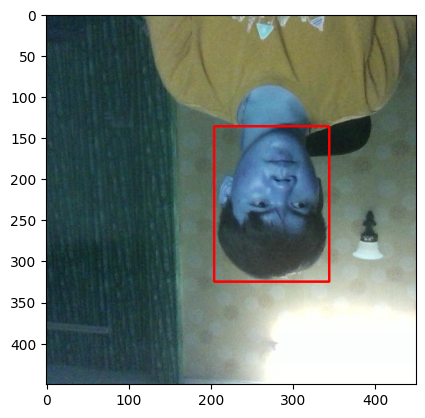

In [142]:
cv2.rectangle(augmented['image'], 
              tuple(np.multiply(augmented['bboxes'][0][:2], [450,450]).astype(int)),
              tuple(np.multiply(augmented['bboxes'][0][2:], [450,450]).astype(int)), 
                    (255,0,0), 2)

plt.imshow(augmented['image'])

# 5. Build and Run Augmentation Pipeline

### 5.1 Run Augmentation Pipeline

In [143]:
for partition in ['train','test','val']: 
    for image in os.listdir(os.path.join('data', partition, 'images')):
        img = cv2.imread(os.path.join('data', partition, 'images', image))

        coords = [0,0,0.00001,0.00001]
        label_path = os.path.join('data', partition, 'labels', f'{image.split(".")[0]}.json')
        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                label = json.load(f)

            coords[0] = label['shapes'][0]['points'][0][0]
            coords[1] = label['shapes'][0]['points'][0][1]
            coords[2] = label['shapes'][0]['points'][1][0]
            coords[3] = label['shapes'][0]['points'][1][1]
            coords = list(np.divide(coords, [640,480,640,480]))
            # print('Found label')
        try: 
            for x in range(60):
                augmented = augmentor(image=img, bboxes=[coords], class_labels=['face'])
                cv2.imwrite(os.path.join('aug_data', partition, 'images', f'{image.split(".")[0]}.{x}.jpg'), augmented['image'])
                # print(f'Augmented {image.split(".")[0]}.{x}.jpg')
                annotation = {}
                annotation['image'] = image

                if os.path.exists(label_path):
                    if len(augmented['bboxes']) == 0: 
                        annotation['bbox'] = [0,0,0,0]
                        annotation['class'] = 0 
                    else: 
                        annotation['bbox'] = augmented['bboxes'][0]
                        annotation['class'] = 1
                else: 
                    annotation['bbox'] = [0,0,0,0]
                    annotation['class'] = 0 
                    

                with open(os.path.join('aug_data', partition, 'labels', f'{image.split(".")[0]}.{x}.json'), 'w') as f:
                    json.dump(annotation, f)

        except Exception as e:
            print(e)

### 5.2 Load Augmented Images to Tensorflow Dataset

In [144]:
train_images = tf.data.Dataset.list_files('aug_data/train/images/*.jpg', shuffle=False)
train_images = train_images.map(load_image)
train_images = train_images.map(lambda x: tf.image.resize(x, (120,120)))
train_images = train_images.map(lambda x: x/255)

In [145]:
test_images = tf.data.Dataset.list_files('aug_data/test/images/*.jpg', shuffle=False)
test_images = test_images.map(load_image)
test_images = test_images.map(lambda x: tf.image.resize(x, (120,120)))
test_images = test_images.map(lambda x: x/255)

In [146]:
val_images = tf.data.Dataset.list_files('aug_data/val/images/*.jpg', shuffle=False)
val_images = val_images.map(load_image)
val_images = val_images.map(lambda x: tf.image.resize(x, (120,120)))
val_images = val_images.map(lambda x: x/255)

In [147]:
train_images.as_numpy_iterator().next()

array([[[0.60251224, 0.6607843 , 0.67745095],
        [0.60949755, 0.66501224, 0.66862744],
        [0.6142157 , 0.67696077, 0.67696077],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.6449142 , 0.69981617, 0.7106005 ],
        [0.66764706, 0.7112745 , 0.71813726],
        [0.6594363 , 0.7142157 , 0.7176471 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       [[0.68333334, 0.74607843, 0.74460787],
        [0.68670344, 0.740625  , 0.7405025 ],
        [0.7009191 , 0.7479779 , 0.7479779 ],
        ...,
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ]],

       ...,

       [[0.        , 0.        , 0.        ],
        [0.        , 0.        , 0.        ],
        [0.        , 0

# 6. Prepare Labels

### 6.1 Build Label Loading Function

In [148]:
def load_labels(label_path):
    with open(label_path.numpy(), 'r', encoding = "utf-8") as f:
        label = json.load(f)
        
    return [label['class']], label['bbox']

### 6.2 Load Labels to Tensorflow Dataset

In [149]:
train_labels = tf.data.Dataset.list_files('aug_data/train/labels/*.json', shuffle=False)
train_labels = train_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [150]:
test_labels = tf.data.Dataset.list_files('aug_data/test/labels/*.json', shuffle=False)
test_labels = test_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [151]:
val_labels = tf.data.Dataset.list_files('aug_data/val/labels/*.json', shuffle=False)
val_labels = val_labels.map(lambda x: tf.py_function(load_labels, [x], [tf.uint8, tf.float16]))

In [152]:
train_labels.as_numpy_iterator().next()[0].shape

(1,)

# 7. Combine Label and Image Samples

### 7.1 Check Partition Lengths

In [153]:
len(train_images), len(train_labels), len(test_images), len(test_labels), len(val_images), len(val_labels)

(3000, 3000, 600, 600, 600, 600)

### 7.2 Create Final Datasets (Images/Labels)

In [154]:
train = tf.data.Dataset.zip((train_images, train_labels))
train = train.shuffle(5000)
train = train.batch(8)
train = train.prefetch(4)

In [155]:
test = tf.data.Dataset.zip((test_images, test_labels))
test = test.shuffle(1300)
test = test.batch(8)
test = test.prefetch(4)

In [156]:
val = tf.data.Dataset.zip((val_images, val_labels))
val = val.shuffle(1000)
val = val.batch(8)
val = val.prefetch(4)

In [157]:
train.as_numpy_iterator().next()[0]

2024-03-08 00:16:58.170144: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 2993 of 5000
2024-03-08 00:16:58.196983: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


array([[[[0.5829657 , 0.58394605, 0.70643383],
         [0.60833335, 0.6122549 , 0.7323529 ],
         [0.61378676, 0.6177083 , 0.7378064 ],
         ...,
         [0.43835783, 0.42267156, 0.47757354],
         [0.4392157 , 0.42352942, 0.47843137],
         [0.42242646, 0.4067402 , 0.46164215]],

        [[0.6207108 , 0.60833335, 0.72922796],
         [0.6362745 , 0.6362745 , 0.74509805],
         [0.6466299 , 0.6510417 , 0.759375  ],
         ...,
         [0.42892158, 0.42107844, 0.4642157 ],
         [0.41072303, 0.39509803, 0.44981617],
         [0.40876225, 0.39307597, 0.45012254]],

        [[0.6539828 , 0.63829654, 0.7373162 ],
         [0.6680147 , 0.66115195, 0.7552696 ],
         [0.6582721 , 0.6661152 , 0.7563113 ],
         ...,
         [0.4192402 , 0.4074755 , 0.44276962],
         [0.41697302, 0.40520832, 0.4483456 ],
         [0.39080882, 0.37512255, 0.4300245 ]],

        ...,

        [[0.21458334, 0.24981618, 0.33872548],
         [0.20968138, 0.25625   , 0.3425245 ]

### 7.3 View Images and Annotations

In [158]:
data_samples = train.as_numpy_iterator()

In [159]:
res = data_samples.next()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


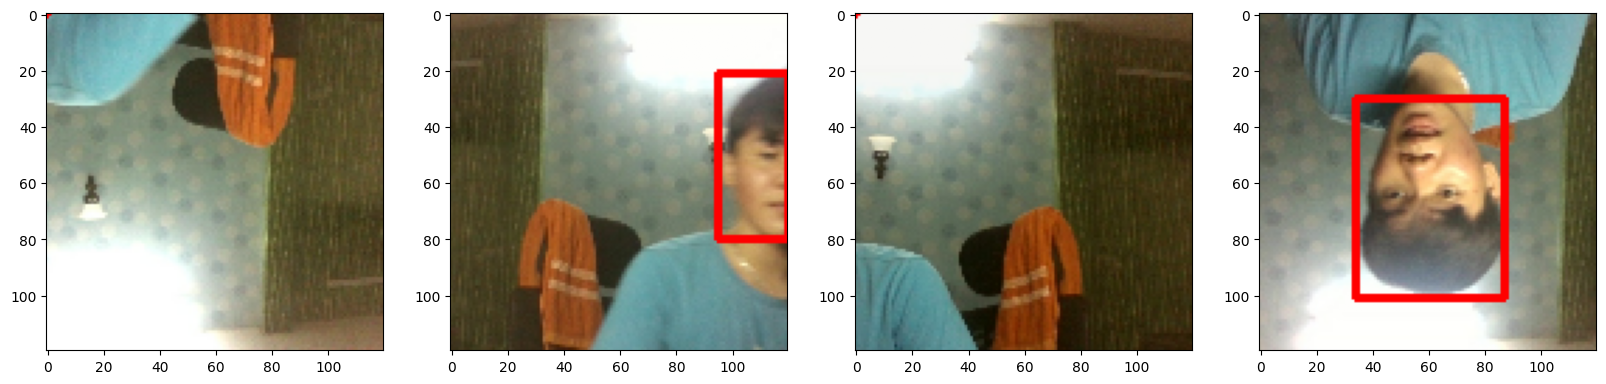

In [160]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = np.copy(res[0][idx])
    sample_coords = res[1][1][idx]
    
    p1 = tuple(np.multiply(sample_coords[:2], [120,120]).astype(int))
    p2 = tuple(np.multiply(sample_coords[2:], [120,120]).astype(int))
    
    cv2.rectangle(sample_image, p1, p2, (255,0,0), 2)
    ax[idx].imshow(sample_image)

# 8. Build Deep Learning using the Functional API

### 8.1 Import Layers and Base Network

In [161]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, Dense, GlobalMaxPooling2D
from tensorflow.keras.applications import VGG16

### 8.2 Download VGG16

In [162]:
vgg = VGG16(include_top=False)

In [163]:
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 block1_conv1 (Conv2D)       (None, None, None, 64)    1792      
                                                                 
 block1_conv2 (Conv2D)       (None, None, None, 64)    36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, None, None, 64)    0         
                                                                 
 block2_conv1 (Conv2D)       (None, None, None, 128)   73856     
                                                                 
 block2_conv2 (Conv2D)       (None, None, None, 128)   147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, None, None, 128)   0     

### 8.3 Build instance of Network

In [164]:
def build_model(): 
    input_layer = Input(shape=(120,120,3))
    
    vgg = VGG16(include_top=False)(input_layer)

    # Classification Model  
    f1 = GlobalMaxPooling2D()(vgg)
    class1 = Dense(2048, activation='relu')(f1)
    class2 = Dense(1, activation='sigmoid')(class1)
    
    # Bounding box model
    f2 = GlobalMaxPooling2D()(vgg)
    regress1 = Dense(2048, activation='relu')(f2)
    regress2 = Dense(4, activation='sigmoid')(regress1)
    
    facetracker = Model(inputs=input_layer, outputs=[class2, regress2])
    return facetracker

### 8.4 Test out Neural Network

In [165]:
facetracker = build_model()

In [166]:
facetracker.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 120, 120, 3)]        0         []                            
                                                                                                  
 vgg16 (Functional)          (None, None, None, 512)      1471468   ['input_2[0][0]']             
                                                          8                                       
                                                                                                  
 global_max_pooling2d (Glob  (None, 512)                  0         ['vgg16[0][0]']               
 alMaxPooling2D)                                                                                  
                                                                                              

In [167]:
X, y = train.as_numpy_iterator().next()

In [168]:
X.shape

(8, 120, 120, 3)

In [169]:
classes, coords = facetracker.predict(X)

2024-03-08 00:17:17.083509: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
2024-03-08 00:17:18.402415: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


1/1 [==============================] - 4s 4s/step


2024-03-08 00:17:19.084524: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory


In [170]:
classes, coords

(array([[0.36371943],
        [0.3654044 ],
        [0.38311374],
        [0.34448195],
        [0.33232212],
        [0.45919698],
        [0.42715064],
        [0.3450141 ]], dtype=float32),
 array([[0.46928242, 0.6984238 , 0.52588725, 0.71215165],
        [0.40470684, 0.5921384 , 0.44675145, 0.6996598 ],
        [0.42743766, 0.6375806 , 0.5512647 , 0.7336002 ],
        [0.46550155, 0.657299  , 0.5255031 , 0.71831995],
        [0.47435004, 0.747453  , 0.5278081 , 0.7180136 ],
        [0.4396233 , 0.62782604, 0.49872854, 0.6854588 ],
        [0.448579  , 0.61340827, 0.4514724 , 0.67405826],
        [0.43405268, 0.7135582 , 0.5416437 , 0.7652389 ]], dtype=float32))

# 9. Define Losses and Optimizers

### 9.1 Define Optimizer and LR

In [171]:
batches_per_epoch = len(train)
lr_decay = (1./0.75 -1)/batches_per_epoch
initial_lr = 0.0001

In [172]:
lr_schedule = tf.keras.optimizers.schedules.ExponentialDecay(initial_lr, decay_steps=batches_per_epoch, decay_rate=0.75, staircase=True)
opt = tf.keras.optimizers.Adam(learning_rate=lr_schedule)

### 9.2 Create Localization Loss and Classification Loss

In [173]:
def localization_loss(y_true, yhat):            
    delta_coord = tf.reduce_sum(tf.square(y_true[:,:2] - yhat[:,:2]))
                  
    h_true = y_true[:,3] - y_true[:,1] 
    w_true = y_true[:,2] - y_true[:,0] 

    h_pred = yhat[:,3] - yhat[:,1] 
    w_pred = yhat[:,2] - yhat[:,0] 
    
    delta_size = tf.reduce_sum(tf.square(w_true - w_pred) + tf.square(h_true-h_pred))
    
    return delta_coord + delta_size

In [174]:
classloss = tf.keras.losses.BinaryCrossentropy()
regressloss = localization_loss

### 9.3 Test out Loss Metrics

In [175]:
localization_loss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.826586>

In [176]:
classloss(y[0], classes)

<tf.Tensor: shape=(), dtype=float32, numpy=0.97974664>

In [177]:
regressloss(y[1], coords)

<tf.Tensor: shape=(), dtype=float32, numpy=5.826586>

# 10. Train Neural Network

### 10.1 Create Custom Model Class

In [178]:
class FaceTracker(Model): 
    def __init__(self, eyetracker,  **kwargs): 
        super().__init__(**kwargs)
        self.model = eyetracker

    def compile(self, opt, classloss, localizationloss, **kwargs):
        super().compile(**kwargs)
        self.closs = classloss
        self.lloss = localizationloss
        self.opt = opt
    
    def train_step(self, batch, **kwargs): 
        
        X, y = batch
        
        with tf.GradientTape() as tape: 
            classes, coords = self.model(X, training=True)
            
            batch_classloss = self.closs(y[0], classes)
            batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
            
            total_loss = batch_localizationloss+0.5*batch_classloss
            
            grad = tape.gradient(total_loss, self.model.trainable_variables)
        
        opt.apply_gradients(zip(grad, self.model.trainable_variables))
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
    
    def test_step(self, batch, **kwargs): 
        X, y = batch
        
        classes, coords = self.model(X, training=False)
        
        batch_classloss = self.closs(y[0], classes)
        batch_localizationloss = self.lloss(tf.cast(y[1], tf.float32), coords)
        total_loss = batch_localizationloss+0.5*batch_classloss
        
        return {"total_loss":total_loss, "class_loss":batch_classloss, "regress_loss":batch_localizationloss}
        
    def call(self, X, **kwargs): 
        return self.model(X, **kwargs)

In [179]:
model = FaceTracker(facetracker)

In [180]:
model.compile(opt, classloss, regressloss)

### 10.2 Train

In [181]:
logdir='logs'

In [182]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [183]:
hist = model.fit(train, validation_data=val, epochs=50, callbacks=[tensorboard_callback])

Epoch 1/50


2024-03-08 00:17:28.442649: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f35b000e090 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-08 00:17:28.442676: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3060 Ti, Compute Capability 8.6
2024-03-08 00:17:28.452636: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1709831848.520402    3985 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


375/375 [==============================] - 27s 37ms/step - total_loss: 0.5341 - class_loss: 0.0932 - regress_loss: 0.4874 - val_total_loss: 0.6340 - val_class_loss: 0.0528 - val_regress_loss: 0.6076
Epoch 2/50
375/375 [==============================] - 20s 35ms/step - total_loss: 0.1021 - class_loss: 0.0230 - regress_loss: 0.0906 - val_total_loss: 0.0546 - val_class_loss: 2.8522e-05 - val_regress_loss: 0.0546
Epoch 3/50
375/375 [==============================] - 20s 36ms/step - total_loss: 0.0491 - class_loss: 0.0149 - regress_loss: 0.0416 - val_total_loss: 0.1106 - val_class_loss: 0.0012 - val_regress_loss: 0.1100
Epoch 4/50
375/375 [==============================] - 20s 37ms/step - total_loss: 0.0350 - class_loss: 0.0093 - regress_loss: 0.0304 - val_total_loss: 0.0616 - val_class_loss: 1.2958e-04 - val_regress_loss: 0.0615
Epoch 5/50
375/375 [==============================] - 21s 36ms/step - total_loss: 0.0226 - class_loss: 0.0073 - regress_loss: 0.0189 - val_total_loss: 0.1153 - val

2024-03-08 00:20:22.805771: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 2258 of 5000
2024-03-08 00:20:27.058361: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


375/375 [==============================] - 28s 36ms/step - total_loss: 0.0042 - class_loss: 5.8616e-04 - regress_loss: 0.0039 - val_total_loss: 0.0634 - val_class_loss: 2.0266e-06 - val_regress_loss: 0.0634
Epoch 10/50
375/375 [==============================] - 23s 36ms/step - total_loss: 0.0036 - class_loss: 4.3051e-04 - regress_loss: 0.0033 - val_total_loss: 0.0651 - val_class_loss: 2.7375e-05 - val_regress_loss: 0.0651
Epoch 11/50
375/375 [==============================] - 23s 42ms/step - total_loss: 0.0024 - class_loss: 1.4934e-04 - regress_loss: 0.0024 - val_total_loss: 0.0996 - val_class_loss: 1.3262e-06 - val_regress_loss: 0.0996
Epoch 12/50


2024-03-08 00:21:37.323391: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 2049 of 5000
2024-03-08 00:21:39.707846: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


375/375 [==============================] - 26s 36ms/step - total_loss: 0.0021 - class_loss: 1.2155e-04 - regress_loss: 0.0020 - val_total_loss: 0.0905 - val_class_loss: 6.7055e-07 - val_regress_loss: 0.0905
Epoch 13/50
375/375 [==============================] - 22s 36ms/step - total_loss: 0.0019 - class_loss: 9.7068e-05 - regress_loss: 0.0018 - val_total_loss: 0.0495 - val_class_loss: 1.4901e-07 - val_regress_loss: 0.0495
Epoch 14/50
375/375 [==============================] - 21s 36ms/step - total_loss: 0.0017 - class_loss: 8.3501e-05 - regress_loss: 0.0017 - val_total_loss: 0.0675 - val_class_loss: 6.9142e-06 - val_regress_loss: 0.0675
Epoch 15/50
375/375 [==============================] - 21s 38ms/step - total_loss: 0.0016 - class_loss: 7.8347e-05 - regress_loss: 0.0015 - val_total_loss: 0.0754 - val_class_loss: 4.6194e-07 - val_regress_loss: 0.0754
Epoch 16/50


2024-03-08 00:23:08.107882: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:422] ShuffleDatasetV3:51: Filling up shuffle buffer (this may take a while): 2153 of 5000


  1/375 [..............................] - ETA: 1:17:35 - total_loss: 0.0011 - class_loss: 7.3464e-06 - regress_loss: 0.0011

2024-03-08 00:23:10.352148: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:452] Shuffle buffer filled.


375/375 [==============================] - 26s 36ms/step - total_loss: 0.0015 - class_loss: 7.2668e-05 - regress_loss: 0.0015 - val_total_loss: 0.0233 - val_class_loss: 8.3447e-07 - val_regress_loss: 0.0233
Epoch 17/50
375/375 [==============================] - 23s 36ms/step - total_loss: 0.0014 - class_loss: 6.6969e-05 - regress_loss: 0.0014 - val_total_loss: 0.0713 - val_class_loss: 6.4821e-06 - val_regress_loss: 0.0713
Epoch 18/50
375/375 [==============================] - 22s 36ms/step - total_loss: 0.0014 - class_loss: 6.4214e-05 - regress_loss: 0.0013 - val_total_loss: 0.0632 - val_class_loss: 7.4506e-08 - val_regress_loss: 0.0632
Epoch 19/50
375/375 [==============================] - 21s 36ms/step - total_loss: 0.0013 - class_loss: 6.7951e-05 - regress_loss: 0.0013 - val_total_loss: 0.1320 - val_class_loss: 5.7072e-06 - val_regress_loss: 0.1320
Epoch 20/50
375/375 [==============================] - 21s 36ms/step - total_loss: 0.0013 - class_loss: 5.9275e-05 - regress_loss: 0.001

### 10.3 Plot Performance

In [184]:
hist.history

{'total_loss': [0.24925385415554047,
  0.050282880663871765,
  0.012896292842924595,
  0.016231589019298553,
  0.005903673358261585,
  0.004392903298139572,
  0.003182270796969533,
  0.0028741653077304363,
  0.0032243828754872084,
  0.0027017833199352026,
  0.0009715462219901383,
  0.001361765549518168,
  0.00033563157194294035,
  0.0031600105576217175,
  0.0007004777435213327,
  0.0014045464340597391,
  0.0008728508837521076,
  0.0010760590666905046,
  0.007662964519113302,
  0.0010907122632488608,
  0.002496743807569146,
  0.00047455966705456376,
  0.0008864565170370042,
  0.0012595388107001781,
  0.000931440619751811,
  0.0014178004348650575,
  0.0018535914132371545,
  0.0007715508691035211,
  0.0007886840612627566,
  0.0008820045622996986,
  0.0018596498994156718,
  0.0008892266778275371,
  0.000942492566537112,
  0.0019862595945596695,
  0.0011531977215781808,
  0.0005199247389100492,
  0.00041176166268996894,
  0.0006337476661428809,
  0.0005692618433386087,
  0.00098476372659206

In [185]:
# save the history
import json
with open('history.json', 'w') as f:
    json.dump(hist.history, f)
    


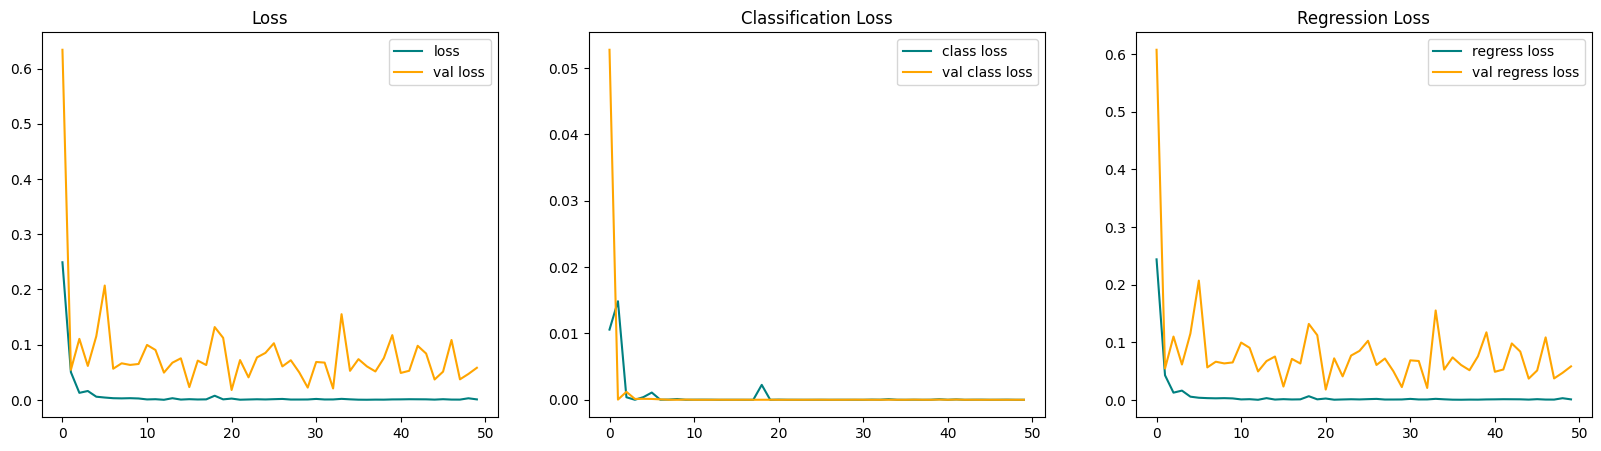

In [186]:
fig, ax = plt.subplots(ncols=3, figsize=(20,5))

ax[0].plot(hist.history['total_loss'], color='teal', label='loss')
ax[0].plot(hist.history['val_total_loss'], color='orange', label='val loss')
ax[0].title.set_text('Loss')
ax[0].legend()

ax[1].plot(hist.history['class_loss'], color='teal', label='class loss')
ax[1].plot(hist.history['val_class_loss'], color='orange', label='val class loss')
ax[1].title.set_text('Classification Loss')
ax[1].legend()

ax[2].plot(hist.history['regress_loss'], color='teal', label='regress loss')
ax[2].plot(hist.history['val_regress_loss'], color='orange', label='val regress loss')
ax[2].title.set_text('Regression Loss')
ax[2].legend()

plt.show()

# 11. Make Predictions

### 11.1 Make Predictions on Test Set

In [187]:
test_data = test.as_numpy_iterator()

In [188]:
test_sample = test_data.next()

In [189]:
yhat = facetracker.predict(test_sample[0])

1/1 [==============================] - 0s 11ms/step


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


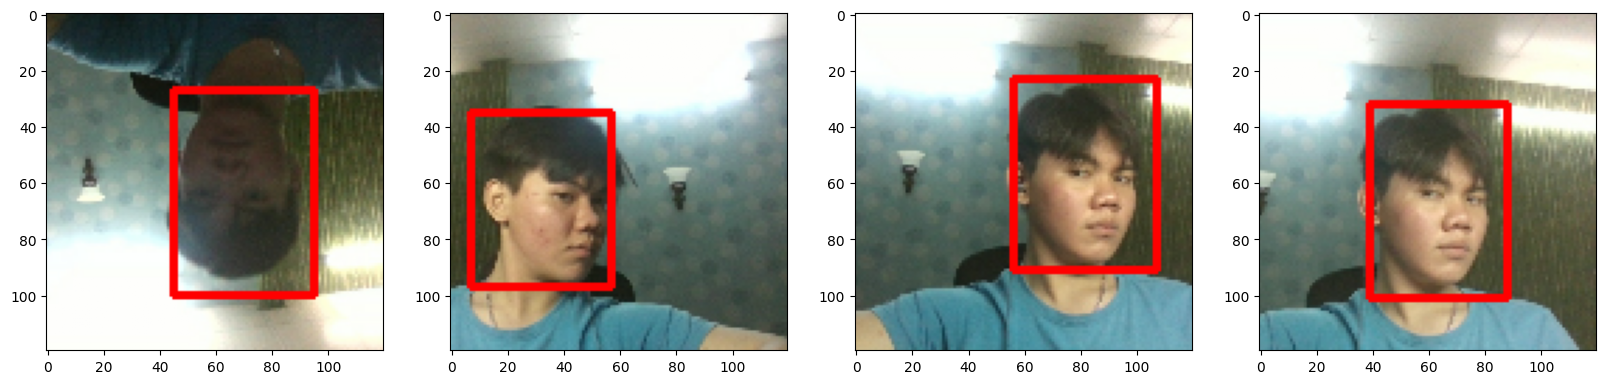

In [190]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx in range(4): 
    sample_image = np.copy(test_sample[0][idx])
    sample_coords = yhat[1][idx]
    
    if yhat[0][idx] > 0.9:
        cv2.rectangle(sample_image, 
                      tuple(np.multiply(sample_coords[:2], [120,120]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [120,120]).astype(int)), 
                            (255,0,0), 2)
    
    ax[idx].imshow(sample_image)

### 11.2 Save the Model

In [191]:
from tensorflow.keras.models import load_model

In [192]:
facetracker.save('facetracker.h5')

/home/thienphunhc/.local/lib/python3.10/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [193]:
facetracker = load_model('facetracker.h5')

### 11.3 Real Time Detection

In [199]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    _ , frame = cap.read()
    frame = frame[50:500, 50:500,:]
    
    rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    resized = tf.image.resize(rgb, (120,120))
    
    yhat = facetracker.predict(np.expand_dims(resized/255,0))
    sample_coords = yhat[1][0]
    
    if yhat[0] > 0.5: 
        # Controls the main rectangle
        cv2.rectangle(frame, 
                      tuple(np.multiply(sample_coords[:2], [450,450]).astype(int)),
                      tuple(np.multiply(sample_coords[2:], [450,450]).astype(int)), 
                            (255,0,0), 2)
        # Controls the label rectangle
        cv2.rectangle(frame, 
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int), 
                                    [0,-30])),
                      tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                    [80,0])), 
                            (255,0,0), -1)
        
        # Controls the text rendered
        cv2.putText(frame, 'face', tuple(np.add(np.multiply(sample_coords[:2], [450,450]).astype(int),
                                               [0,-5])),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255,255,255), 2, cv2.LINE_AA)
    
    cv2.imshow('EyeTrack', frame)
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

[ WARN:0@2480.358] global cap_v4l.cpp:997 open VIDEOIO(V4L2:/dev/video0): can't open camera by index
[ERROR:0@2480.358] global obsensor_uvc_stream_channel.cpp:159 getStreamChannelGroup Camera index out of range


error: OpenCV(4.9.0) /io/opencv/modules/highgui/src/window.cpp:1266: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvDestroyAllWindows'
